# Implementación de Algoritmos de Ordenamiento

## BubbleSort

In [1]:
def bubbleSort(array : list[int])->list[int]:
    n = len(array)
    changes = 0
    comparisons = 0
    for i in range(n - 1):
        for j in range(n - 1 - i):
            comparisons += 1
            if array[j] > array[j + 1]:
                array[j + 1], array[j] = array[j], array[j + 1]
                changes += 1
    print('com: ', comparisons, ', cambios: ', changes)
    return array

In [2]:
vec = [6, 1, 0, 8, 3, 5, 9, 20]
bubbleSort(vec)

com:  28 , cambios:  7


[0, 1, 3, 5, 6, 8, 9, 20]

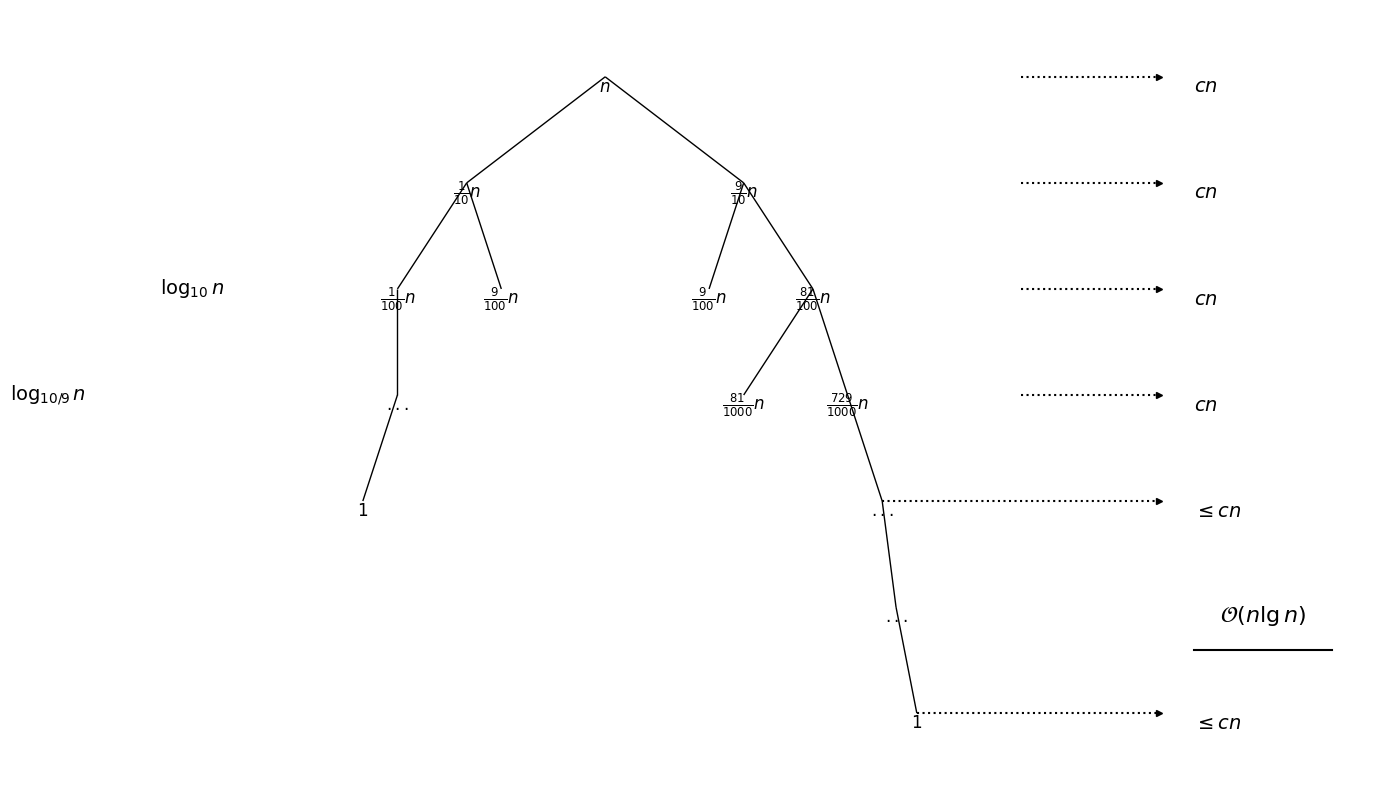

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_asymmetric_recursion_tree():
    """
    Recrea el árbol de recursión asimétrico T(n) = T(n/10) + T(9n/10) + cn 
    con las anotaciones de coste y altura.
    """
    G = nx.DiGraph()
    
    # 1. Definición de nodos y aristas (estructura fija del gráfico original)
    nodes_and_labels = {
        0: 'n', 1: '\\frac{1}{10} n', 2: '\\frac{9}{10} n',
        3: '\\frac{1}{100} n', 4: '\\frac{9}{100} n', 5: '\\frac{9}{100} n', 6: '\\frac{81}{100} n',
        7: '...', 8: '1', # Rama izquierda corta
        9: '\\frac{81}{1000} n', 10: '\\frac{729}{1000} n', # Continuación de rama derecha
        11: '...', 12: '...', # Puntos suspensivos en rama profunda
        13: '1', # Caso base de la rama profunda
    }
    edges = [
        (0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6),
        (3, 7), (7, 8), (6, 9), (6, 10), (10, 11), (11, 12), (12, 13)
    ]
    G.add_edges_from(edges)
    labels = {i: f'${v}$' for i, v in nodes_and_labels.items()}
    
    depth_map = {
        0: [0], 1: [1, 2], 2: [3, 4, 5, 6], 3: [7, 9, 10], 
        4: [8, 11], 5: [12], 6: [13]
    }
    
    # 2. Posicionamiento manual de nodos
    pos = {}
    x_coords = {0: 0, 1: -2, 2: 2, 3: -3, 4: -1.5, 5: 1.5, 6: 3, 7: -3, 8: -3.5, 9: 2, 10: 3.5, 11: 4, 12: 4.2, 13: 4.5}
    y_step = -2
    for depth, node_list in depth_map.items():
        for node_id in node_list:
            pos[node_id] = (x_coords[node_id], depth * y_step)

    # 3. Dibujo del gráfico
    fig, ax = plt.subplots(figsize=(14, 8))

    # Dibujar aristas
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='black', arrows=False)
    
    # Dibujar etiquetas de los nodos
    label_pos = {k: (v[0], v[1] - 0.2) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, labels=labels, font_size=12, font_family='serif', font_weight='normal')

    # 4. Añadir Anotaciones
    
    # A. Anotaciones de Costo por Nivel (cn)
    max_x = max(p[0] for p in pos.values())
    cn_x_start = max_x + 1.5 
    cn_x_end = max_x + 3.5
    y_cn_labels = [0, -2, -4, -6] 
    
    # *** CAMBIO APLICADO AQUÍ: markevery=[1] en lugar de markevery=[1.0] ***
    for y_level in y_cn_labels:
        ax.plot([cn_x_start, cn_x_end], [y_level, y_level], 
                linestyle=':', color='black', marker='>', 
                markevery=[1], markersize=5, zorder=0) 
        ax.text(cn_x_end + 0.5, y_level - 0.2, '$cn$', fontsize=14, ha='left', va='center', fontname='serif')

    # Costo en la parte inferior (<= cn)
    y_le_cn_labels = [pos[11][1], pos[13][1]]
    
    # Nivel 4: ...
    ax.plot([pos[11][0], cn_x_end], [y_le_cn_labels[0], y_le_cn_labels[0]], 
            linestyle=':', color='black', marker='>', 
            markevery=[1], markersize=5, zorder=0) # *** CAMBIO APLICADO ***
    ax.text(cn_x_end + 0.5, y_le_cn_labels[0] - 0.2, '$\\leq cn$', fontsize=14, ha='left', va='center', fontname='serif')

    # Nivel 6: 1
    ax.plot([pos[13][0], cn_x_end], [y_le_cn_labels[1], y_le_cn_labels[1]], 
            linestyle=':', color='black', marker='>', 
            markevery=[1], markersize=5, zorder=0) # *** CAMBIO APLICADO ***
    ax.text(cn_x_end + 0.5, y_le_cn_labels[1] - 0.2, '$\\leq cn$', fontsize=14, ha='left', va='center', fontname='serif')

    # B. Anotaciones de Altura (Logaritmos)
    y_start_l = pos[0][1] 
    y_end_l = pos[8][1] 
    x_l = min(p[0] for p in pos.values()) - 1.5
    
    ax.annotate("", xy=(x_l, y_start_l), xytext=(x_l, y_end_l), arrowprops=dict(arrowstyle="<->", color="black", shrinkA=5, shrinkB=5))
    ax.text(x_l - 0.5, (y_start_l + y_end_l) / 2, '$\\log_{10} n$', fontsize=14, ha='right', va='center', fontname='serif')

    y_end_r = pos[13][1] 
    x_r = x_l - 2
    
    ax.annotate("", xy=(x_r, y_start_l), xytext=(x_r, y_end_r), arrowprops=dict(arrowstyle="<->", color="black", shrinkA=5, shrinkB=5))
    ax.text(x_r - 0.5, (y_start_l + y_end_r) / 2, '$\\log_{10/9} n$', fontsize=14, ha='right', va='center', fontname='serif')
    
    # C. Complejidad Total
    ax.plot([cn_x_end + 0.5, cn_x_end + 2.5], [y_end_r + 1.2, y_end_r + 1.2], color='black', linestyle='-')
    ax.text(cn_x_end + 1.5, y_end_r + 1.6, '$\\mathcal{O}(n \\lg n)$', fontsize=16, ha='center', va='bottom', fontname='serif')

    ax.axis('off')
    plt.tight_layout()
    plt.show()

draw_asymmetric_recursion_tree()

In [9]:
def median_of_3(x1, x2, x3):
    if (x2 <= x1 and x1<=x3) or (x3 <= x1 and x1<=x2):
        return x1
    elif(x1 <= x2 and x2<=x3) or (x3 <= x2 and x2<=x1):
        return x2
    else:
        return x3

In [ ]:
class QuickSort:
    def __init__(self, array) -> None:
        self.array = array
    def partition(self, low, high):
        if low < high:
            pivot = median_of_3(self.array[low], self.array[(high + low)// 2], self.array[high])
